Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from tqdm.auto import tqdm
from icecream import ic

In [18]:
NUM_KNAPSACKS = 3
NUM_ITEMS = 10
NUM_DIMENSIONS = 2

In [19]:
VALUES = np.random.randint(0, 100, size=NUM_ITEMS)
WEIGHTS = np.random.randint(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = np.random.randint(
    0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

In [20]:
CONSTRAINTS

array([[114,  77],
       [225,   4],
       [236, 236]], dtype=int32)

## TEST PROBLEMS

In [21]:
Params = namedtuple(
    "Params",
    [
        "num_knapsacks",
        "num_items",
        "num_dimensions",
        "values",
        "weights",
        "constraints",
    ],
)

Solution = namedtuple("Solution", ["best_solution", "fitness"])

In [22]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)
params_problem_1 = Params(
    NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS
)

In [31]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)
params_problem_2 = Params(
    NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS
)


In [24]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    1000 * 10,
    1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS,
    size=(NUM_KNAPSACKS, NUM_DIMENSIONS),
)
params_problem_3 = Params(
    NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS
)

## SOLUTION

In [25]:
### visualize fitness
def plot_fitness(fitness_history):
    plt.plot(fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Fitness over Generations")
    plt.grid()
    plt.show()

In [51]:
### simulated aanealing
"""
params: Params - problem parameters (number of knapsacks, items, dimensions, values, weights, constraints)
max_iter: int - maximum number of iterations
t: float - initial temperature
"""


def sim_aneal(params: Params, max_iter: int, t: float):
    # validity check - ensure no knapsack exceeds its constraints
    def is_valid(solution: np.ndarray) -> bool:
        for knapsack_idx in range(1, params.num_knapsacks + 1):
            if np.any(
                params.weights[solution == knapsack_idx].sum(axis=0)
                > params.constraints[knapsack_idx - 1]
            ):
                return False
        return True

    # fitness function - total value + balance between knapsacks
    def fitnessF(solution) -> tuple[int, float]:
        total_value = 0
        value_per_knapsack = np.zeros(params.num_knapsacks, dtype=int)

        for knapsack_idx in range(1, params.num_knapsacks + 1):
            knapsack_value = np.sum(params.values[solution == knapsack_idx])
            total_value += knapsack_value
            value_per_knapsack[knapsack_idx - 1] = knapsack_value
        return total_value, -float(
            np.std(value_per_knapsack, mean=total_value / params.num_knapsacks)
        )

    # tweak function - randomly assign an item to a different knapsack
    def tweak(solution: np.ndarray) -> np.ndarray:
        item_idx = np.random.randint(0, params.num_items)
        if np.random.rand() < 0.03:
            new_knapsack_idx = 0
        else:
            new_knapsack_idx = np.random.randint(1, params.num_knapsacks + 1)

        new_solution = solution.copy()
        new_solution[item_idx] = new_knapsack_idx
        return new_solution

    initial_solution = np.zeros(params.num_items, dtype=int)
    best_solution = initial_solution
    current_solution = initial_solution
    fitness_history = [fitnessF(current_solution)[0]]

    for iter in tqdm(range(max_iter)):
        new_solution = tweak(current_solution)

        if is_valid(new_solution):
            current_fitness = fitnessF(current_solution)
            new_fitness = fitnessF(new_solution)

            if new_fitness > current_fitness:
                best_solution = new_solution
                current_solution = new_solution
            else:
                p = np.exp((new_fitness[0] - current_fitness[0]) / t)
                if np.random.rand() < p:
                    current_solution = new_solution
        t = t * (1 - (iter / max_iter))
        fitness_history.append(fitnessF(current_solution)[0])
    return Solution(best_solution, fitnessF(best_solution)[0]), fitness_history

  0%|          | 0/5000 [00:00<?, ?it/s]

 46%|████▋     | 2324/5000 [00:00<00:00, 3068.50it/s]C:\Users\Alberto\AppData\Local\Temp\ipykernel_20992\2938893686.py:61: RuntimeWarning: overflow encountered in divide
  p = np.exp((new_fitness[0] - current_fitness[0]) / t)
C:\Users\Alberto\AppData\Local\Temp\ipykernel_20992\2938893686.py:61: RuntimeWarning: invalid value encountered in divide
  p = np.exp((new_fitness[0] - current_fitness[0]) / t)
C:\Users\Alberto\AppData\Local\Temp\ipykernel_20992\2938893686.py:61: RuntimeWarning: divide by zero encountered in divide
  p = np.exp((new_fitness[0] - current_fitness[0]) / t)
100%|██████████| 5000/5000 [00:01<00:00, 2910.62it/s]


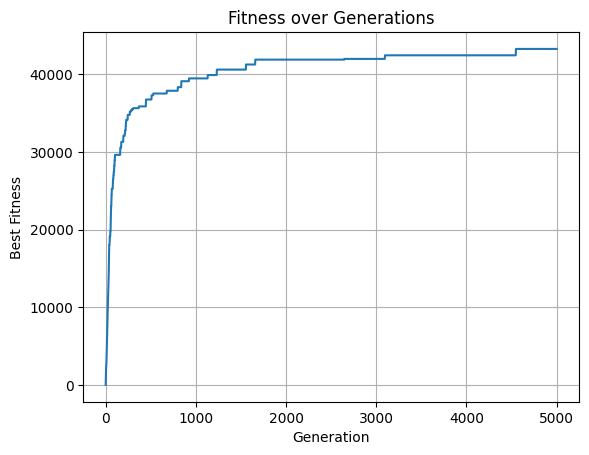

ic| best_solution: Solution(best_solution=array([ 0,  3,  9, 10,  9,  6,  0,  3,  7,  4,  0,  7,  1,  1,  4,  4,  3,
                           4,  0,  8,  9,  2,  3,  5,  4, 10,  4,  4,  8,  6,  0,  3,  0,  5,
                          10,  0,  2,  9,  4,  8,  0,  8, 10,  7,  5,  0,  7,  2,  5, 10, 10,
                           0,  4,  7,  6,  0,  2,  7, 10,  8,  1,  1,  2,  0,  0,  2,  0,  0,
                           9,  0,  6,  5, 10,  5,  9,  0,  1,  2,  9,  0,  2,  6,  0,  6,  5,
                           3,  3,  8,  5, 10,  6,  0,  7,  2,  7,  5,  9,  4,  0,  1]), fitness=np.int64(43239))


Solution(best_solution=array([ 0,  3,  9, 10,  9,  6,  0,  3,  7,  4,  0,  7,  1,  1,  4,  4,  3,
        4,  0,  8,  9,  2,  3,  5,  4, 10,  4,  4,  8,  6,  0,  3,  0,  5,
       10,  0,  2,  9,  4,  8,  0,  8, 10,  7,  5,  0,  7,  2,  5, 10, 10,
        0,  4,  7,  6,  0,  2,  7, 10,  8,  1,  1,  2,  0,  0,  2,  0,  0,
        9,  0,  6,  5, 10,  5,  9,  0,  1,  2,  9,  0,  2,  6,  0,  6,  5,
        3,  3,  8,  5, 10,  6,  0,  7,  2,  7,  5,  9,  4,  0,  1]), fitness=np.int64(43239))

In [52]:
# best_solution, fitness_history = sim_aneal(params_problem_1, max_iter=1000, t=100)
# plot_fitness(fitness_history)
# ic(best_solution)
best_solution, fitness_history = sim_aneal(params_problem_2, max_iter=5000, t=1000)
plot_fitness(fitness_history)
ic(best_solution)
# best_solution, fitness_history = sim_aneal(params_problem_3, max_iter=10000, t=10000)
# plot_fitness(fitness_history)
# ic(best_solution)